# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create an empty lists to store the responses
response_json = []
city_name = []
Lat = []           
Lng = []          
Max_Temp = []      
Humidity = []      
Cloudiness = []   
Wind_Speed = []   
Country = []      
Date = []


url = "http://api.openweathermap.org/data/2.5/weather?"
units='imperial'
# setting up counter
count = 1
query_url = f"{url}appid={weather_api_key}&units={units}&q="
for x in cities:
    weather_response = requests.get(query_url+x).json()  
    try:
        city_name.append(weather_response['name'])
        Cloudiness.append(weather_response['clouds']['all'])
        Country.append(weather_response['sys']['country'])
        Date.append(weather_response['dt'])
        Humidity.append(weather_response['main']['humidity'])
        Lat.append(weather_response['coord']['lat'])
        Lng.append(weather_response['coord']['lon'])
        Max_Temp.append(weather_response['main']['temp_max'])
        Wind_Speed.append(weather_response['wind']['speed'])
        print(f'processing record for city number {count}, {x}')        
        count = count + 1 
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
        print("------------")

processing record for city number 1, muhos
processing record for city number 2, maniitsoq
processing record for city number 3, dunedin
processing record for city number 4, bluff
processing record for city number 5, sao joao da barra
processing record for city number 6, kruisfontein
processing record for city number 7, saint george
processing record for city number 8, kavieng
processing record for city number 9, esperance
processing record for city number 10, kholm
processing record for city number 11, fort-shevchenko
processing record for city number 12, dikson
processing record for city number 13, longyearbyen
processing record for city number 14, airai
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
processing record for city number 15, naze
processing record for city number 16, ancud
processing record for city number 17, rikitea
processing record for city number 18, vila velha
processing record for city number 19, avigliana
processing re

Missing field/result... skipping.
------------
processing record for city number 156, itanagar
processing record for city number 157, saskylakh
processing record for city number 158, sola
processing record for city number 159, chokurdakh
processing record for city number 160, powassan
processing record for city number 161, qaanaaq
processing record for city number 162, livingstonia
processing record for city number 163, chuy
processing record for city number 164, zhoucheng
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
processing record for city number 165, santa cruz de la palma
processing record for city number 166, gryfino
processing record for city number 167, cidreira
processing record for city number 168, port blair
processing record for city number 169, ambilobe
processing record for city number 170, bansi
processing record for city number 171, tazovskiy
processing record for city number 172, kaitangata
processing record for city nu

processing record for city number 310, ginda
processing record for city number 311, burgess hill
processing record for city number 312, dudinka
Missing field/result... skipping.
------------
processing record for city number 313, tongren
processing record for city number 314, jumla
Missing field/result... skipping.
------------
processing record for city number 315, sukhodol
processing record for city number 316, mar del plata
processing record for city number 317, reshetylivka
processing record for city number 318, bandarbeyla
processing record for city number 319, taoudenni
processing record for city number 320, mitsamiouli
processing record for city number 321, svetlaya
processing record for city number 322, chernyshevskiy
processing record for city number 323, asyut
processing record for city number 324, ponyri
processing record for city number 325, kant
processing record for city number 326, padang
processing record for city number 327, tevriz
processing record for city number 328

processing record for city number 470, tingi
processing record for city number 471, gladstone
processing record for city number 472, bushehr
processing record for city number 473, dukat
processing record for city number 474, vicuna
processing record for city number 475, nadadores
Missing field/result... skipping.
------------
processing record for city number 476, kushiro
processing record for city number 477, zharkent
processing record for city number 478, houma
processing record for city number 479, yarada
processing record for city number 480, rodrigues alves
processing record for city number 481, katima mulilo
processing record for city number 482, kemijarvi
processing record for city number 483, provideniya
processing record for city number 484, boueni
processing record for city number 485, hommersak
processing record for city number 486, natal
processing record for city number 487, listvyanskiy
processing record for city number 488, predivinsk
Missing field/result... skipping.
--

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({'City':city_name,
                          'Lat':Lat,
                          'Lng':Lng,
                          'Max Temp':Max_Temp,
                          'Humidity':Humidity,
                          'Cloudiness':Cloudiness,
                          'Wind Speed':Wind_Speed,
                          'Country':Country,
                          'Date':Date})

In [6]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muhos,64.8080,25.9931,17.60,86,90,3.44,FI,1612055847
1,Maniitsoq,65.4167,-52.9000,11.41,77,0,7.23,GL,1612055789
2,Dunedin,-45.8742,170.5036,62.01,70,100,23.00,NZ,1612055749
3,Bluff,-46.6000,168.3333,58.21,68,98,7.40,NZ,1612055780
4,São João da Barra,-21.6403,-41.0511,77.97,78,1,21.68,BR,1612055718
...,...,...,...,...,...,...,...,...,...
537,Labuhan,-6.8844,112.2051,80.02,83,100,6.53,ID,1612055823
538,Sibolga,1.7427,98.7792,77.09,73,41,3.62,ID,1612055869
539,Gouyave,12.1646,-61.7296,80.60,78,20,11.50,GD,1612056030
540,Naryan-Mar,67.6713,53.0870,1.17,92,100,11.12,RU,1612056031


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humid_cities= weather_df[(weather_df['Humidity']>100)].index
humid_cities

Int64Index([], dtype='int64')

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(humid_cities,inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muhos,64.8080,25.9931,17.60,86,90,3.44,FI,1612055847
1,Maniitsoq,65.4167,-52.9000,11.41,77,0,7.23,GL,1612055789
2,Dunedin,-45.8742,170.5036,62.01,70,100,23.00,NZ,1612055749
3,Bluff,-46.6000,168.3333,58.21,68,98,7.40,NZ,1612055780
4,São João da Barra,-21.6403,-41.0511,77.97,78,1,21.68,BR,1612055718


In [10]:
latitude = clean_city_data['Lat']
max_temp = clean_city_data['Max Temp']

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

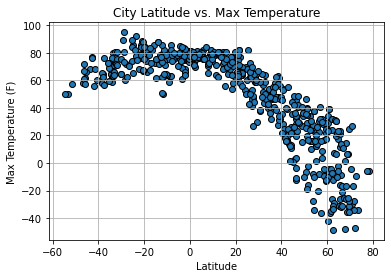

In [11]:
plt.scatter(latitude,max_temp, marker = "o",edgecolor="black")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

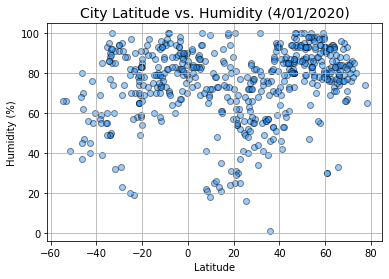

In [51]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], color="dodgerblue", marker="o", edgecolors="black", alpha=.45)
plt.title(f"City Latitude vs. Humidity (4/01/2020)",size=14)
plt.grid(True)
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")
plt.show()

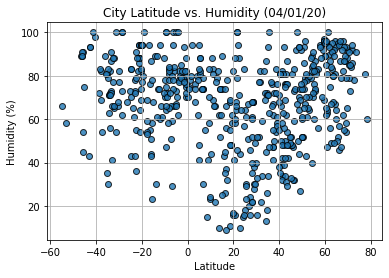

## Latitude vs. Cloudiness Plot

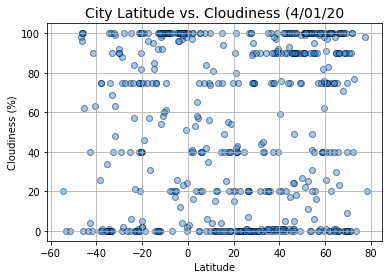

In [52]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], color="dodgerblue", marker="o", edgecolors="black", alpha=.45)
plt.title(f"City Latitude vs. Cloudiness (4/01/20",size=14)
plt.xlabel(f"Latitude")
plt.grid(True)
plt.ylabel("Cloudiness (%)")
plt.show()

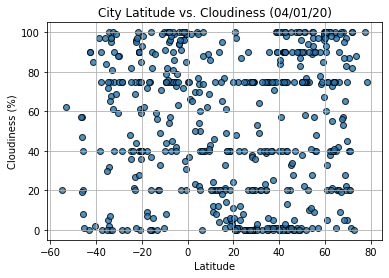

## Latitude vs. Wind Speed Plot

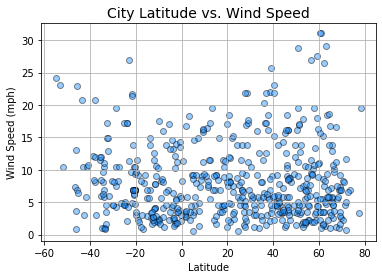

In [53]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], color="dodgerblue", marker="o", edgecolors="black", alpha=.45)
plt.title(f"City Latitude vs. Wind Speed",size=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()

## Linear Regression

In [32]:
northern_df = clean_city_data[clean_city_data["Lat"]>0]
#northern_df.describe()
southern_df = clean_city_data[clean_city_data["Lat"]<0]
#southern_df.describe()


# Northern Values
N_Lat = northern_df["Lat"]
N_Max_Temp = northern_df["Max Temp"]
N_Humidity = northern_df["Humidity"]
N_Cloud = northern_df["Cloudiness"]
N_Wind = northern_df["Wind Speed"]

#Southern Values
S_Lat = southern_df["Lat"]
S_Max_Temp = southern_df["Max Temp"]
S_Humidity = southern_df["Humidity"]
S_Cloud = southern_df["Cloudiness"]
S_Wind = southern_df["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:
def North_Linear(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    Y = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
    #Plot 
    plt.scatter(x,y, color="blue", marker="o", edgecolors="black", alpha=.45,)
    #add Linear Regression Line
    plt.plot(x,Y,color="dodgerblue",alpha=1)
    #add x label
    plt.xlabel("Latitude")

The r-value is: 0.46937863826630627


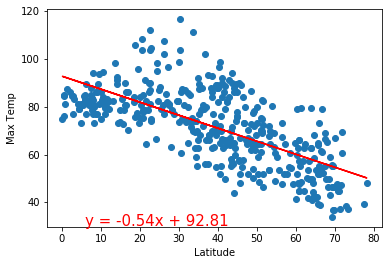

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [54]:
def South_Linear(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    Y = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
    #Plot 
    plt.scatter(x,y, color="dodgerblue", marker="o", edgecolors="black", alpha=.45,)
    #add Linear Regression Line
    plt.plot(x,Y,color="dodgerblue",alpha=1)
    #add x label
    plt.xlabel("Latitude")

The r-value is: 0.6082708688906918


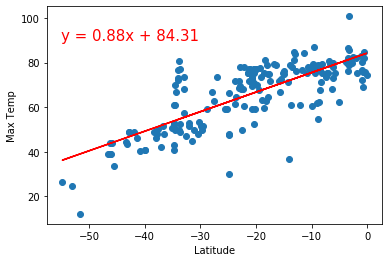

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.3x + 62.99


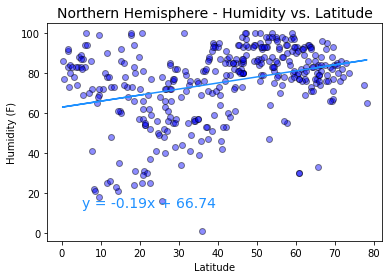

In [55]:
North_Linear(N_Lat,N_Humidity)
plt.title("Northern Hemisphere - Humidity vs. Latitude",size=14)
plt.ylabel("Humidity (F)")
plt.annotate(("y = -0.19x + 66.74"),(5,13),size=14,color="dodgerblue",alpha=1)

#Show Plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.52x + 85.74


<function matplotlib.pyplot.show(close=None, block=None)>

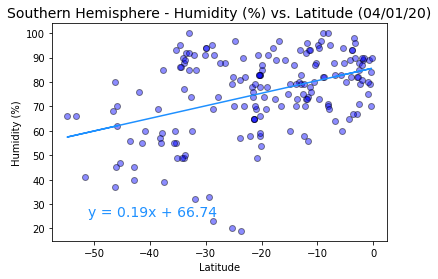

In [45]:
South_Linear(S_Lat,S_Humidity)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (04/01/20)",size=14)
plt.ylabel("Humidity (%)")
plt.annotate(("y = 0.19x + 66.74"),(-51,25),size=14,color="dodgerblue",alpha=1)

#SHOW 
plt.show

The r-value is: 0.014985174297345524


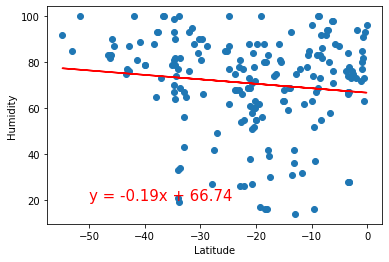

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.51x + 30.74


<function matplotlib.pyplot.show(close=None, block=None)>

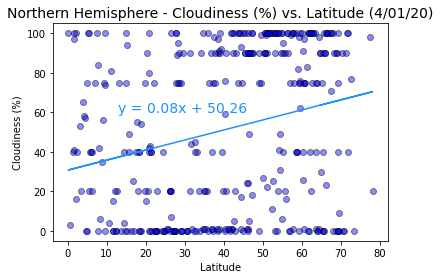

In [46]:
North_Linear(N_Lat,N_Cloud)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (4/01/20)",size=14)
plt.ylabel("Cloudiness (%)")
plt.annotate(("y = 0.08x + 50.26"),(13,60),size=14,color="dodgerblue",alpha=1)

#SHOW 
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.97x + 76.71


<function matplotlib.pyplot.show(close=None, block=None)>

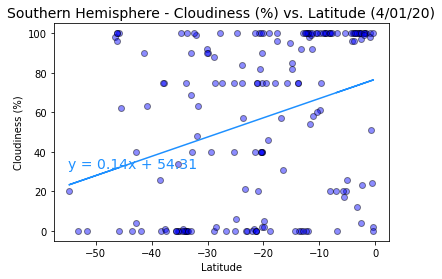

In [47]:
South_Linear(S_Lat,S_Cloud)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (4/01/20)",size=14)
plt.ylabel("Cloudiness (%)")
plt.annotate(("y = 0.14x + 54.31"),(-55,32),size=14,color="dodgerblue",alpha=1)

#SHOW 
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.0x + 8.14


<function matplotlib.pyplot.show(close=None, block=None)>

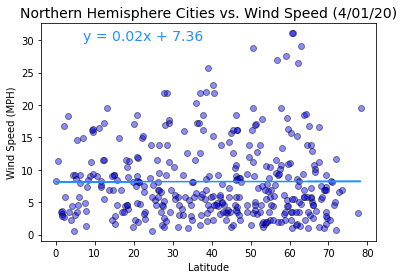

In [48]:
North_Linear(N_Lat,N_Wind)
plt.title("Northern Hemisphere Cities vs. Wind Speed (4/01/20)",size=14)
plt.ylabel("Wind Speed (MPH)")
plt.annotate(("y = 0.02x + 7.36"),(7,30),size=14,color="dodgerblue",alpha=1)

#SHOW 
plt.show


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.11x + 5.6


<function matplotlib.pyplot.show(close=None, block=None)>

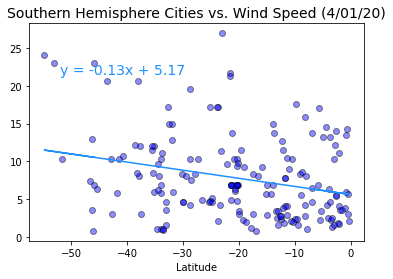

In [49]:
South_Linear(S_Lat,S_Wind)
plt.title("Southern Hemisphere Cities vs. Wind Speed (4/01/20)",size=14)
plt.annotate(("y = -0.13x + 5.17"),(-52,21.5),size=14,color="dodgerblue",alpha=1)

#SHOW 
plt.show